In [1]:
import networkx as nx
import syft as sy
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
import pprint

from syft.service.action.action_graph_service import ActionGraphService
from syft.service.action.action_graph import InMemoryActionGraphStore, InMemoryGraphConfig, InMemoryStoreClientConfig
from syft.service.context import AuthedServiceContext
from syft.node.credentials import SyftSigningKey
from syft.service.action.action_graph import Action, NodeActionData, NodeActionDataUpdate
from syft.service.action.action_graph import ActionStatus
from syft.service.action.numpy import NumpyArrayObject, ActionObject
from syft.service.action.action_graph import NetworkXBackingStore

print(sy.__version__)

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /home/dk/Desktop/projects/PySyft


0.8.0-beta.9


<Figure size 4000x2000 with 0 Axes>

### Initialize the action graph service with verify key

In [3]:
store_config = InMemoryGraphConfig()
graph_store = InMemoryActionGraphStore(store_config=store_config)
action_graph_service = ActionGraphService(store=graph_store)

In [3]:
signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
authed_context = AuthedServiceContext(credentials=verify_key)

### Create some dummy data

In [4]:
action_obj_a = ActionObject.from_obj([2, 4, 6])
action_obj_b = ActionObject.from_obj([2, 3, 4])

### Create the action graph

```
action1 -> a + b = c

action2 -> initialization of variable `d`

action3 -> c * d

action4 -> inplace updation of type of `d` (d.astype('int32'))

action5 -> d + 48
```

#### action1 -> a + b = c

In [5]:
action1 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = 875edf0b17ab4b76afe70131c6e5557d
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:12
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

#### action2 -> initialization of variable `d`

In [6]:
action_obj_d = ActionObject.from_obj([1, 2, 3])
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action2)

```python
class NodeActionData:
  id: str = 51984a262d6b484585a36eaac0047f24
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:14
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

In [7]:
node_action_data_2: NodeActionData = graph_store.get(
    uid=action2.id, credentials=verify_key
).ok()

In [8]:
node_action_data_2

```python
class NodeActionData:
  id: str = 51984a262d6b484585a36eaac0047f24
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:14
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

#### action3 -> c * d

In [9]:
action3 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action3)

```python
class NodeActionData:
  id: str = 0dd7530c69c34463b17836991199f112
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:44
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

#### action4 -> d.astype('int32')

In [10]:
as_type_action_obj = ActionObject.from_obj('np.int32')
as_type_action_obj

'np.int32'

In [11]:
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,  # pay attention here
    args=[as_type_action_obj.syft_lineage_id],  # pay attention here
    kwargs={},
    result_id=action2.result_id  # pay attention here
)
action4

```python
class Action:
  id: str = 7c4a824da2dd44f2a15dd42688aa5d36
  path: str = "action.execute"
  op: str = "astype"
  remote_self: str = ac15a116481a4c54bf89fc92f21d748a
  args: str = [<LineageID: 12843657e16b44d0b701a51d1d0f10d5 - 802581761684485983>]
  kwargs: str = {}
  result_id: str = ac15a116481a4c54bf89fc92f21d748a

```

In [12]:
action_graph_service.add_action(context=authed_context, action=action4)

```python
class NodeActionData:
  id: str = 7c4a824da2dd44f2a15dd42688aa5d36
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:55
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

In [20]:
node_action_data_2: NodeActionData = graph_store.get(
    uid=action2.id, credentials=verify_key
).ok()
node_action_data_2.is_mutated == True

True

#### action5 -> d + 48

In [13]:
arg_action_obj = ActionObject.from_obj(48)
action5 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action4.result_id,
    args=[arg_action_obj.syft_lineage_id],
    kwargs={},
)
action_graph_service.add_action(context=authed_context, action=action5)

```python
class NodeActionData:
  id: str = 0047678e565346cfb3506b1e93db9329
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 04:09:58
  updated_at: str = None
  user_verify_key: str = b4df4e46311f5083d14581e5638ae388a4071e4e86b72aa92057039e542b96bd
  is_mutated: str = False

```

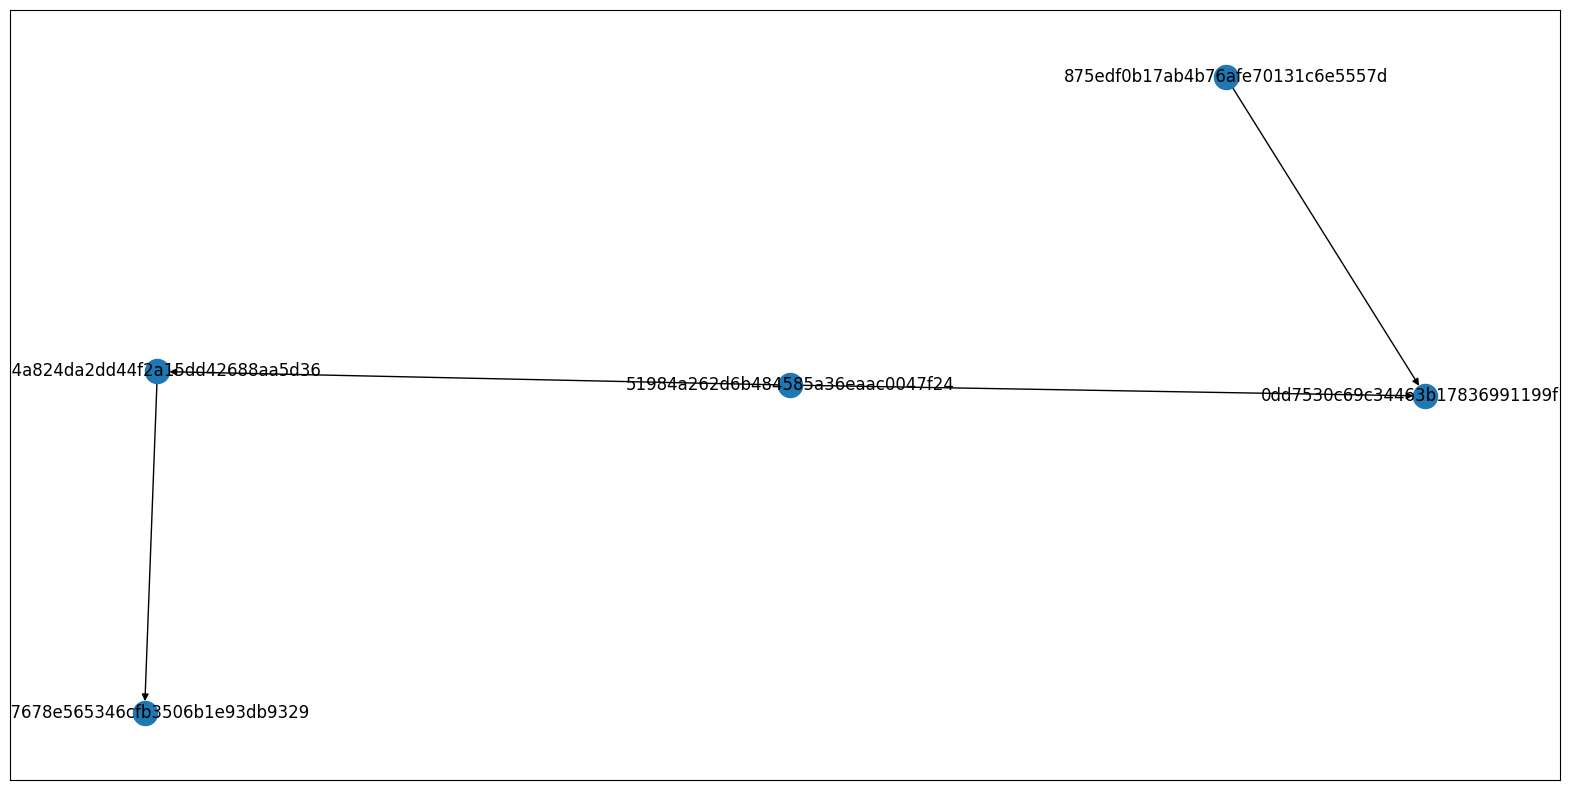

In [14]:
plt.figure(figsize=(20, 10))
action_graph_service.store.graph.visualize()

In [17]:
print(f"{action1.id = }")
print(f"{action2.id = }")
print(f"{action3.id = }")
print(f"{action4.id = }")
print(f"{action5.id = }")

action1.id = <UID: 875edf0b17ab4b76afe70131c6e5557d>
action2.id = <UID: 51984a262d6b484585a36eaac0047f24>
action3.id = <UID: 0dd7530c69c34463b17836991199f112>
action4.id = <UID: 7c4a824da2dd44f2a15dd42688aa5d36>
action5.id = <UID: 0047678e565346cfb3506b1e93db9329>


## Mutation

In [2]:
store_config = InMemoryGraphConfig()
graph_store = InMemoryActionGraphStore(store_config=store_config)
action_graph_service = ActionGraphService(store=graph_store)

In [3]:
signing_key = SyftSigningKey.generate()
verify_key = signing_key.verify_key
authed_context = AuthedServiceContext(credentials=verify_key)

#### action1 -> initialization of variable `a`

In [4]:
action_obj_a = ActionObject.from_obj([1, 2, 3])
action1 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_a.syft_lineage_id],
    kwargs={}
)
action_graph_service.add_action(context=authed_context, action=action1)

```python
class NodeActionData:
  id: str = 29f5bbb86c804a43ace489cd465cf432
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 03:46:15
  updated_at: str = None
  user_verify_key: str = b4dbfda114857e4b4a5235847487c9e368c248daf2ab7b6fb8de35c3a5922a8e
  is_mutated: str = False

```

#### action2 -> a.astype('int32') = b: mutation

In [5]:
as_type_action_obj = ActionObject.from_obj('np.int32')
action2 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id  # pay attention here
)
action_graph_service.add_action(context=authed_context, action=action2)

```python
class NodeActionData:
  id: str = f74d663c5fd24dc9a076bfe2548e04f3
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 03:46:18
  updated_at: str = None
  user_verify_key: str = b4dbfda114857e4b4a5235847487c9e368c248daf2ab7b6fb8de35c3a5922a8e
  is_mutated: str = False

```

#### action3 -> b.astype('float64') = c: mutation

In [6]:
as_type_action_obj = ActionObject.from_obj('np.float64')
action3 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id
)
action_graph_service.add_action(context=authed_context, action=action3)

```python
class NodeActionData:
  id: str = 5562dc9f86fd457ca8aa82b340db0601
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 03:46:21
  updated_at: str = None
  user_verify_key: str = b4dbfda114857e4b4a5235847487c9e368c248daf2ab7b6fb8de35c3a5922a8e
  is_mutated: str = False

```

#### action4 -> a.astype('complex128') = d: mutation

In [7]:
as_type_action_obj = ActionObject.from_obj('np.complex128')
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action1.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action1.result_id
)
action_graph_service.add_action(context=authed_context, action=action4)

```python
class NodeActionData:
  id: str = 095791a38deb4d0bb9339de8bfe9293a
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 03:46:23
  updated_at: str = None
  user_verify_key: str = b4dbfda114857e4b4a5235847487c9e368c248daf2ab7b6fb8de35c3a5922a8e
  is_mutated: str = False

```

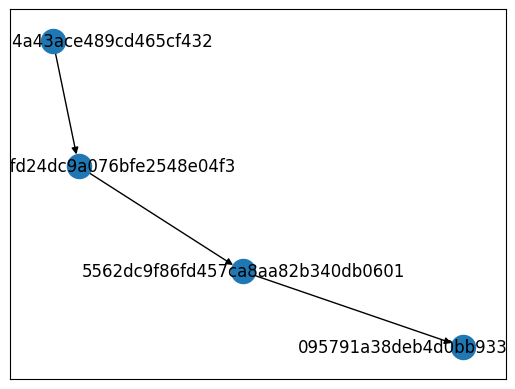

In [8]:
action_graph_service.store.graph.visualize()

In [9]:
print(f"{action1.id = }")
print(f"{action2.id = }")
print(f"{action3.id = }")
print(f"{action4.id = }")

action1.id = <UID: 29f5bbb86c804a43ace489cd465cf432>
action2.id = <UID: f74d663c5fd24dc9a076bfe2548e04f3>
action3.id = <UID: 5562dc9f86fd457ca8aa82b340db0601>
action4.id = <UID: 095791a38deb4d0bb9339de8bfe9293a>


In [15]:
node_action_data_1 = graph_store.get(uid=action1.id, credentials=verify_key).ok()
node_action_data_2 = graph_store.get(uid=action2.id, credentials=verify_key)
node_action_data_3 = graph_store.get(uid=action3.id, credentials=verify_key)
node_action_data_4 = graph_store.get(uid=action4.id, credentials=verify_key)

In [16]:
node_action_data_1

```python
class NodeActionData:
  id: str = 29f5bbb86c804a43ace489cd465cf432
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 03:46:15
  updated_at: str = 2023-04-26 03:46:23
  user_verify_key: str = b4dbfda114857e4b4a5235847487c9e368c248daf2ab7b6fb8de35c3a5922a8e
  is_mutated: str = True

```

In [17]:
graph_store.is_parents()

In [22]:
list(graph_store.graph.get_successors(node_action_data_1.id))

,type,id
0,<UID: f74d663c5fd24dc9a076bfe2548e04f3>,None


### Serde

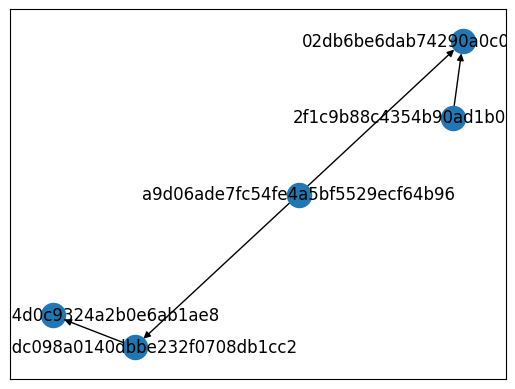

In [2]:
store_config = InMemoryGraphConfig()
verify_key = SyftSigningKey.generate().verify_key
graph_store = InMemoryActionGraphStore(store_config=store_config)

# create some actions and add them to the graph store
action_obj_a = ActionObject.from_obj([2, 4, 6])
action_obj_b = ActionObject.from_obj([2, 3, 4])
# action1 -> a + b = c
action1 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action_obj_a.syft_lineage_id,
    args=[action_obj_b.syft_lineage_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action1)
# action2 -> initialization of variable d
action_obj_d = ActionObject.from_obj([1, 2, 3])
action2 = Action(
    path="action.execute",
    op="np.array",
    remote_self=None,
    args=[action_obj_d.syft_lineage_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action2)
# action3 -> c * d
action3 = Action(
    path="action.execute",
    op="__mul__",
    remote_self=action1.result_id,
    args=[action2.result_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action3)
# action4 -> d.astype('int32')
as_type_action_obj = ActionObject.from_obj("np.int32")
action4 = Action(
    path="action.execute",
    op="astype",
    remote_self=action2.result_id,
    args=[as_type_action_obj.syft_lineage_id],
    kwargs={},
    result_id=action2.result_id,
)
graph_store.set(credentials=verify_key, action=action4)

# check if the node action 2 has been mutated
node_action_data_2: NodeActionData = graph_store.get(
    uid=action2.id, credentials=verify_key
).ok()
arg_action_obj = ActionObject.from_obj(48)
action5 = Action(
    path="action.execute",
    op="__add__",
    remote_self=action4.result_id,
    args=[arg_action_obj.syft_lineage_id],
    kwargs={},
)
graph_store.set(credentials=verify_key, action=action5)
graph_store.graph.visualize()

In [3]:
print(f"{action1.id = }")
print(f"{action2.id = }")
print(f"{action3.id = }")
print(f"{action4.id = }")
print(f"{action5.id = }")

action1.id = <UID: c333cb42c68f4ea3b382e1016bdb5715>
action2.id = <UID: 62cc7a78c62a48f3b2474b980ea3bb6d>
action3.id = <UID: dbb717c7b1874bcfa6dac01909ec7b57>
action4.id = <UID: ca3709445bcd4d98ba57669d417218d9>
action5.id = <UID: 79aafb289898461780f9c463106701d7>


In [4]:
graph_store.graph.db.nodes(data=True)

NodeDataView({<UID: c333cb42c68f4ea3b382e1016bdb5715>: {'data': class NodeActionData:
  id: str = c333cb42c68f4ea3b382e1016bdb5715
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 08:59:27
  updated_at: str = None
  user_verify_key: str = 61bf77ac488cd57ecd232ac4e1bd9a153f0f4ef58a5ac7e0e84c6b8ec1b9ac8a
  is_mutated: str = False
}, <UID: 62cc7a78c62a48f3b2474b980ea3bb6d>: {'data': class NodeActionData:
  id: str = 62cc7a78c62a48f3b2474b980ea3bb6d
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 08:59:27
  updated_at: str = 2023-04-26 08:59:27
  user_verify_key: str = 61bf77ac488cd57ecd232ac4e1bd9a153f0f4ef58a5ac7e0e84c6b8ec1b9ac8a
  is_mutated: str = True
}, <UID: dbb717c7b1874bcfa6dac01909ec7b57>: {'data': class NodeActionData:
  id: str = dbb717c7b1874bcfa6dac01909ec7b57
  action: str = syft.serv

In [4]:
data = nx.cytoscape_data(graph_store.graph.db)
data

{'data': [],
 'directed': True,
 'multigraph': False,
 'elements': {'nodes': [{'data': {'data': class NodeActionData:
       id: str = c39ab042fcf848ebb8274bdc9ab49d00
       action: str = syft.service.action.action_object.Action
       status: str = ActionStatus.PROCESSING
       retry: str = 0
       user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
       is_mutated: str = False,
     'id': 'c39ab042fcf848ebb8274bdc9ab49d00',
     'value': <UID: c39ab042fcf848ebb8274bdc9ab49d00>,
     'name': 'c39ab042fcf848ebb8274bdc9ab49d00'}},
   {'data': {'data': class NodeActionData:
       id: str = 69c9cfdf67ff44549ad20a0313722b70
       action: str = syft.service.action.action_object.Action
       status: str = ActionStatus.PROCESSING
       retry: str = 0
       user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
       is_mutated: str = False,
     'id': '69c9cfdf67ff44549ad20a0313722b70',
     'value': <UID: 69c9cfdf67ff44549ad20a0313722b70>,
     'name': '69c9cfdf67ff44549ad20a0313722b70'}},
   {'data': {'data': class NodeActionData:
       id: str = f212e89e68364fe7923a211af7aa2fe6
       action: str = syft.service.action.action_object.Action
       status: str = ActionStatus.PROCESSING
       retry: str = 0
       user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
       is_mutated: str = False,
     'id': 'f212e89e68364fe7923a211af7aa2fe6',
     'value': <UID: f212e89e68364fe7923a211af7aa2fe6>,
     'name': 'f212e89e68364fe7923a211af7aa2fe6'}},
   {'data': {'data': class NodeActionData:
       id: str = a5e440534ca9441599ef885694c4ec8c
       action: str = syft.service.action.action_object.Action
       status: str = ActionStatus.PROCESSING
       retry: str = 0
       user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
       is_mutated: str = False,
     'id': 'a5e440534ca9441599ef885694c4ec8c',
     'value': <UID: a5e440534ca9441599ef885694c4ec8c>,
     'name': 'a5e440534ca9441599ef885694c4ec8c'}},
   {'data': {'data': class NodeActionData:
       id: str = 0c4b0cc29cbc4aa4a754174604fab711
       action: str = syft.service.action.action_object.Action
       status: str = ActionStatus.PROCESSING
       retry: str = 0
       user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
       is_mutated: str = False,
     'id': '0c4b0cc29cbc4aa4a754174604fab711',
     'value': <UID: 0c4b0cc29cbc4aa4a754174604fab711>,
     'name': '0c4b0cc29cbc4aa4a754174604fab711'}}],
  'edges': [{'data': {'source': <UID: c39ab042fcf848ebb8274bdc9ab49d00>,
     'target': <UID: f212e89e68364fe7923a211af7aa2fe6>}},
   {'data': {'source': <UID: 69c9cfdf67ff44549ad20a0313722b70>,
     'target': <UID: f212e89e68364fe7923a211af7aa2fe6>}},
   {'data': {'source': <UID: 69c9cfdf67ff44549ad20a0313722b70>,
     'target': <UID: a5e440534ca9441599ef885694c4ec8c>}},
   {'data': {'source': <UID: 69c9cfdf67ff44549ad20a0313722b70>,
     'target': <UID: 0c4b0cc29cbc4aa4a754174604fab711>}},
   {'data': {'source': <UID: a5e440534ca9441599ef885694c4ec8c>,
     'target': <UID: 0c4b0cc29cbc4aa4a754174604fab711>}}]}}

In [5]:
bytes_data = sy.serialize(data, to_bytes=True)
bytes_data

b'\x01\x00\x00\x00\x08\x00\x00\x00\xf2\x0c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00r\x00\x00\x00\t\x00\x00\x00\x0e\x00\x00\x00builtins.dict\x00\x00\x00\x02\x00\x00\x00\x01\x00\x00\x00\x01\x00\x00\x00B<\x03\x00\x01\x00\x00\x00X\x00\x00\x00\x97\x0c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x00\x05\x00\x00\x00&\x00\x00\x00\x11\x00\x00\x00&\x00\x00\x00\x1d\x00\x00\x00\x82\x02\x00\x00u\x00\x00\x00\x82\x02\x00\x00\xc5\x00\x00\x00\xc2\x02\x00\x00\x19\x01\x00\x00\x82\x02\x00\x005\x00\x00\x00\x0e\x00\x00\x00\x8d\x00\x00\x00\x0e\x00\x00\x00\xe1\x00\x00\x00\x0e\x00\x00\x001\x01\x00\x00\x0e\x00\x00\x00\x00\x00\x00\x00\t\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x00\x00\x00j\x00\x00\x00\t\x00\x00\x00\x0e\x00\x00\x00builtins.str\x00\x00\x00\x00\x01\x00\x00\x00"\x00\x00\x00data\x00\x00\x00\x00\x01\x00\x00\x00\x02\x03\x00\x00\x00

In [6]:
data_back = sy.deserialize(bytes_data, from_bytes=True)

In [7]:
data_back

{'data': [],
 'directed': True,
 'multigraph': False,
 'elements': {'nodes': [{'data': {'data': class NodeActionData:
       id: str = c39ab042fcf848ebb8274bdc9ab49d00
       action: str = syft.service.action.action_object.Action
       status: str = ActionStatus.PROCESSING
       retry: str = 0
       user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
       is_mutated: str = False,
     'id': 'c39ab042fcf848ebb8274bdc9ab49d00',
     'value': <UID: c39ab042fcf848ebb8274bdc9ab49d00>,
     'name': 'c39ab042fcf848ebb8274bdc9ab49d00'}},
   {'data': {'data': class NodeActionData:
       id: str = 69c9cfdf67ff44549ad20a0313722b70
       action: str = syft.service.action.action_object.Action
       status: str = ActionStatus.PROCESSING
       retry: str = 0
       user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
       is_mutated: str = False,
     'id': '69c9cfdf67ff44549ad20a0313722b70',
     'value': <UID: 69c9cfdf67ff44549ad20a0313722b70>,
     'name': '69c9cfdf67ff44549ad20a0313722b70'}},
   {'data': {'data': class NodeActionData:
       id: str = f212e89e68364fe7923a211af7aa2fe6
       action: str = syft.service.action.action_object.Action
       status: str = ActionStatus.PROCESSING
       retry: str = 0
       user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
       is_mutated: str = False,
     'id': 'f212e89e68364fe7923a211af7aa2fe6',
     'value': <UID: f212e89e68364fe7923a211af7aa2fe6>,
     'name': 'f212e89e68364fe7923a211af7aa2fe6'}},
   {'data': {'data': class NodeActionData:
       id: str = a5e440534ca9441599ef885694c4ec8c
       action: str = syft.service.action.action_object.Action
       status: str = ActionStatus.PROCESSING
       retry: str = 0
       user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
       is_mutated: str = False,
     'id': 'a5e440534ca9441599ef885694c4ec8c',
     'value': <UID: a5e440534ca9441599ef885694c4ec8c>,
     'name': 'a5e440534ca9441599ef885694c4ec8c'}},
   {'data': {'data': class NodeActionData:
       id: str = 0c4b0cc29cbc4aa4a754174604fab711
       action: str = syft.service.action.action_object.Action
       status: str = ActionStatus.PROCESSING
       retry: str = 0
       user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
       is_mutated: str = False,
     'id': '0c4b0cc29cbc4aa4a754174604fab711',
     'value': <UID: 0c4b0cc29cbc4aa4a754174604fab711>,
     'name': '0c4b0cc29cbc4aa4a754174604fab711'}}],
  'edges': [{'data': {'source': <UID: c39ab042fcf848ebb8274bdc9ab49d00>,
     'target': <UID: f212e89e68364fe7923a211af7aa2fe6>}},
   {'data': {'source': <UID: 69c9cfdf67ff44549ad20a0313722b70>,
     'target': <UID: f212e89e68364fe7923a211af7aa2fe6>}},
   {'data': {'source': <UID: 69c9cfdf67ff44549ad20a0313722b70>,
     'target': <UID: a5e440534ca9441599ef885694c4ec8c>}},
   {'data': {'source': <UID: 69c9cfdf67ff44549ad20a0313722b70>,
     'target': <UID: 0c4b0cc29cbc4aa4a754174604fab711>}},
   {'data': {'source': <UID: a5e440534ca9441599ef885694c4ec8c>,
     'target': <UID: 0c4b0cc29cbc4aa4a754174604fab711>}}]}}

In [8]:
de_graph_store = nx.cytoscape_graph(data_back)

In [12]:
de_graph_store.nodes(data=True)

NodeDataView({<UID: c39ab042fcf848ebb8274bdc9ab49d00>: {'data': class NodeActionData:
  id: str = c39ab042fcf848ebb8274bdc9ab49d00
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
  is_mutated: str = False
, 'id': 'c39ab042fcf848ebb8274bdc9ab49d00', 'value': <UID: c39ab042fcf848ebb8274bdc9ab49d00>, 'name': 'c39ab042fcf848ebb8274bdc9ab49d00'}, <UID: 69c9cfdf67ff44549ad20a0313722b70>: {'data': class NodeActionData:
  id: str = 69c9cfdf67ff44549ad20a0313722b70
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  user_verify_key: str = a88d5b4201ab00131e5a9183b10cd5623138e57b9626382de85bc9244b866f10
  is_mutated: str = False
, 'id': '69c9cfdf67ff44549ad20a0313722b70', 'value': <UID: 69c9cfdf67ff44549ad20a0313722b70>, 'name': '69c9cfdf67ff44549ad20a0313722b70'}, <UID: f212e89e

In [9]:
graph_store.graph.edges() == de_graph_store.graph.edges()

True

In [17]:
graph_store.nodes

Ok(NodeDataView({<UID: 614d5a85e73f45d3ba3cec52db7ddef8>: {'data': class NodeActionData:
  id: str = 614d5a85e73f45d3ba3cec52db7ddef8
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 07:44:25
  updated_at: str = None
  user_verify_key: str = ce68f54250882db27d4a833a281acc8fbcb93304a9d69741aac638304cde38f5
  is_mutated: str = False
}, <UID: 0ecdf84b54e4457daf9656827f331f02>: {'data': class NodeActionData:
  id: str = 0ecdf84b54e4457daf9656827f331f02
  action: str = syft.service.action.action_object.Action
  status: str = ActionStatus.PROCESSING
  retry: str = 0
  created_at: str = 2023-04-26 07:44:25
  updated_at: str = 2023-04-26 07:44:25
  user_verify_key: str = ce68f54250882db27d4a833a281acc8fbcb93304a9d69741aac638304cde38f5
  is_mutated: str = True
}, <UID: f1d4649745094e4fb6a39d1d0dc8cbfb>: {'data': class NodeActionData:
  id: str = f1d4649745094e4fb6a39d1d0dc8cbfb
  action: str = syft.s

In [11]:
de_graph_store.graph.db

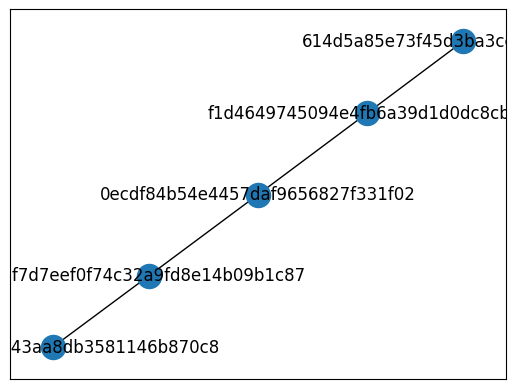

In [12]:
de_graph_store.graph.visualize()

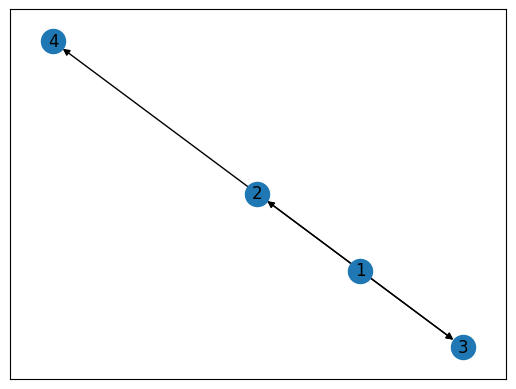

In [20]:
D = nx.DiGraph()
D.add_edges_from([(1, 2), (2, 3), (1, 3), (2, 4)])
nx.draw_networkx(D)

In [21]:
data1 = nx.node_link_data(D)
data1

{'directed': True,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}],
 'links': [{'source': 1, 'target': 2},
  {'source': 1, 'target': 3},
  {'source': 2, 'target': 3},
  {'source': 2, 'target': 4}]}

In [23]:
sy.serialize(data1)

<recursive_serde.capnp:RecursiveSerde builder (fullyQualifiedName = "builtins.dict", nonrecursiveBlob = ["\000\000\000\000\n\002\000\000\000\000\000\000\000\000\002\000\005\000\000\000.\000\000\000\025\000\000\000.\000\000\000%\000\000\000\202\002\000\000u\000\000\000\302\002\000\000\311\000\000\000\202\002\000\000%\001\000\000\202\002\000\000\335\003\000\000\202\002\000\0009\000\000\000\016\000\000\000\215\000\000\000\016\000\000\000\335\000\000\000\016\000\000\0009\001\000\000\016\000\000\000\361\003\000\000\016\000\000\000\000\000\000\000\t\000\000\000\000\000\000\000\000\000\004\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\005\000\000\000j\000\000\000\t\000\000\000\016\000\000\000builtins.str\000\000\000\000\001\000\000\000B\000\000\000directed\001\000\000\000\202\002\000\000\000\000\000\000\t\000\000\000\000\000\000\000\000\000\004\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\000\005\000\000\000r\000\000\000\t\000\000\000\016\000\000\000bu

In [28]:
data = sy.deserialize(sy.serialize(data1))

In [29]:
H = nx.node_link_graph(data)

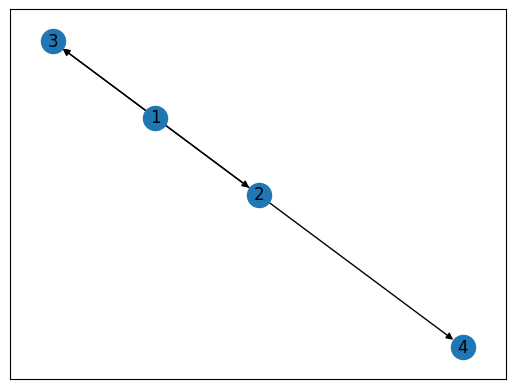

In [30]:
nx.draw_networkx(H)